<a href="https://colab.research.google.com/github/LisavanEijk/PRA3024/blob/master/Submission_assignment_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submission assignment 3: Machine learning**

Exercise: ML_cifar_CNN_exercise. 

By: Lisa van Eijk

Student ID: i6294465

In [1]:
#ML_cifar_CNN_exercise
#By: Lisa van Eijk
#Student ID: i6294465

# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')
    
    fo.close()
    return dict




def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)
    
        

    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)
    

def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):
    
    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]
    
    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)
    
    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')
    
    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])

    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [2]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import tensorflow.keras as keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


In [3]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Dataset not found. Downloading...
Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


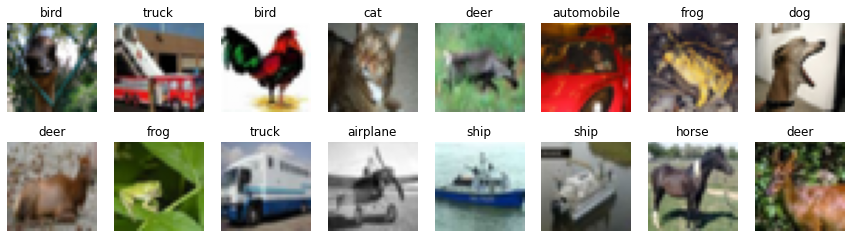

In [4]:
# show some random images from train, and their labels

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In [5]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.layers import LeakyReLU

In [37]:

def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential()

    ### STUDENT CODE HERE ###
    ### --> Build your convolutional neural network. 
    ### First, make a CNN layer with some small kernels to learn some basic features, with Conv2D.
    ### Then, add a Pooling layer to pick up the relevant kernels.
    ### Then, Flatten it and add some fully-connected (Dense) normal NN layers,
    ###  to learn the relevant combinations of low-level kernel features.
    ### Finally, some regularisation is advised, using a Dropout layer, to avoid local minima.
    ### Make sure the output is of the same shape as the number of labels we have,
    ### And the input is the same as the figures (which now have a 3rd dimension - color!)
    ### Again, use google to find information on these classes.
    model.add(Conv2D(10, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding = "SAME", use_bias = True))
    model.add(Conv2D(20, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding = "SAME", use_bias = True))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(40, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding = "SAME", use_bias = True))
    model.add(Conv2D(80, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding = "SAME", use_bias = True))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(100, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding = "SAME", use_bias = True))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 10, activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dropout(rate = 0.1))
    model.add(BatchNormalization())
    model.add(Dense(units = 10, activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dropout(rate = 0.1))
    model.add(BatchNormalization())
    model.add(Dense(units = 10, activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dropout(rate = 0.1))
    model.add(BatchNormalization())
    ### END STUDENT CODE ### 

    # Ensure normalized probabilities over the 10 classes
    model.add(Activation("softmax")) 

    return model

In [38]:
### STUDENT CODE HERE ###
### --> change the parameters below to perform a better training

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 30


K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='binary_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD.
    metrics=['accuracy']  # report accuracy during training
)
# Student code: adding early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.015,
    restore_best_weights=True,
)

# fit model
model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks = [early_stopping],
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights.h5")

Epoch 1/30
1250/1250 [==============================] - 13s 8ms/step - loss: 0.5537 - accuracy: 0.2444 - val_loss: 0.3987 - val_accuracy: 0.3578
Epoch 2/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3436 - accuracy: 0.3542 - val_loss: 0.2886 - val_accuracy: 0.4661
Epoch 3/30
1250/1250 [==============================] - 9s 8ms/step - loss: 0.2803 - accuracy: 0.4222 - val_loss: 0.2524 - val_accuracy: 0.5196
Epoch 4/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2539 - accuracy: 0.4737 - val_loss: 0.2191 - val_accuracy: 0.5962
Epoch 5/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2381 - accuracy: 0.5067 - val_loss: 0.2037 - val_accuracy: 0.6354
Epoch 6/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2267 - accuracy: 0.5381 - val_loss: 0.2132 - val_accuracy: 0.5876
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2180 - accuracy: 0.5599 - val_loss: 0.1850 - val_acc

In [39]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

313/313 [==============================] - 1s 3ms/step


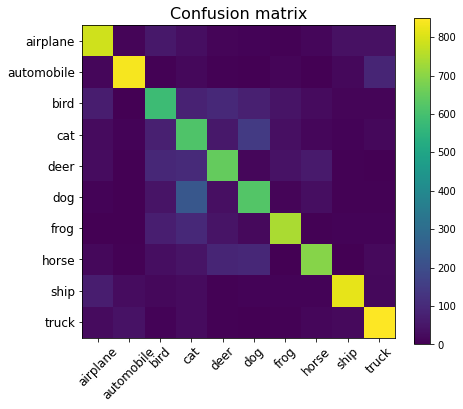

Test accuracy: 0.7197


In [40]:
# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

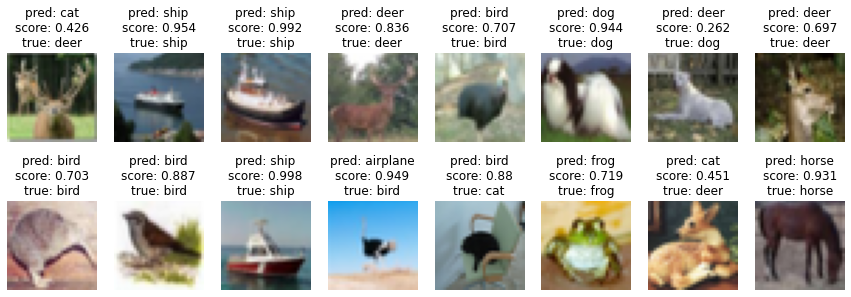

In [43]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

**Report**

**First try (test run).** 

Only adding the neccessary convolutional layer, maximum pooling, flattening and dense layer and changing the amount of epochs to 5. 

Code: 

 model.add(Conv2D(10, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1))

 model.add(MaxPooling2D(pool_size=(2, 2)))

 model.add(Flatten())

 model.add(Dense(units = 10, activation=keras.layers.LeakyReLU(alpha=0.1)))

Result: 

This model resulted in a test accuracy of 0.3544 (35.44%). This model was very inaccurate. 

**Second try.**

For this try, more epochs were added, to test the influence of the number of epochs. The new number of epochs was first changed to 15 and then to 30. 

Result: 

Running the model over 15 epochs resulted in a test accuracy of 0.4319 (43.19%). Using 30 epochs resulted in a test accuracy of 0.4412 (44.12%). For future tries, 30 epochs will be used. From this, it can be concluded that this increase in epochs resulted in a better accuracy and no more underfitting. 

**Third try.**

For this try I added two more dense layers. This resulted in a test accuracy of 0.4198 (41.98%), which is very close still to the accuracy without the extra layers. 

**Fourth try.**

For this try after each layer a dropout layer was added, with a dropout rate of 0.3. This resulted in a much worse accuracy, of 0.3361. There was also a very large difference between the test accuracy (the 0.3361) and the training accuracy, 0.1072. This suggests that the dropout rate is to large. 

**Fifth try.** 

The dropout rate for each layer was now changed to 0.1. This resulted in a test accuracy of 0.3935, so a slight improvement from the fourth try, but still below the third and second tries. The training accuracy was also still much lower (0.1914), suggesting the model was still very unstable. 

**Sixth try.** 

To make the model more stable, after each dropout layer a batchnormalization layer was added. This improved the model to a test accuracy of 0.5850. It also stabilised the model, as the training accurcacy now was 0.5513: very close to the test accuracy. 

**Seventh try.**

Two more convolutional layers were added: one with 20 units below the first convolutional layer and one with 30 units below the newly added second one. For each convolutional layer padding = 'SAME' was added. These changes resulted in an increased test accuracy of 0.6228. However, the training accuracy was higher: 0.6930, suggesting the model was overfitted.  

**Eigth try.**

An early stopping callback was added into the model, to prevent the overfitting and decrease the run time. The model will now stop for changes of accuracy below 0.015 in comparison to the maximum accuracy after 10 epochs. The model only ran 18 epochs and reached around the same test accuracy as the seventh try: 0.6182. The training accuracy was now very close the to the test accuracy again: 0.6348. 

**Nineth try.**

Three more convolutional layers were added to the model, after the already present convolutional layers: one layer with 40 units, one with 50 units and one with 60 units. This increased the test accuracy to 0.6781. Early stopping stopped the run after 20 epochs. The disadvantage of these added layers is that the program now takes longer to run. However, given the increase in the test accuracy, these added layers will be kept in the model. 

**Tenth try.**

Again three more convolutional layers, with units 70, 80 and 90 were added. The test accuracy was increased to 0.6999. 

**Eleventh try.**

Adding 3 more dense layers, each with a batch normalisation layer and dropout layer, decreased test accuracy to 0.6389, while increasing run time. The extra dense layers were deleted. 

**Twelfth try.**

Instead of having 9 convolutional layers leading up to 90 units per layer, the model now has 5 layers: one layer of 10 units, one of 20 units, one of 40 units, one of 80 units and one of 100 units. This decreased run time from 11 minutes to 4 minutes, although it decreased the test accuracy slightly: to 0.6723. 

**Thirteenth try.**

Two more maximum pooling layers were added: one after the 20 unit convolutional layer and one after the 80 unit convolutional layer. This resulted in an increased test accuracy of 0.7084. 

**Fourteenth try.** 

Adding use_bias = True to the convolutional layers resulted in an increased test accuracy of 0.7197. 

**Conclusion.**

In the end, adding 2 more dense layers, combined with dropout and batchnormalisation layers, increased the accuracy of the model. Not more than 2 dense layers should be added though, since adding more decreases the accuracy again. The dropout rate should be kept low, around 0.1, as a higher dropout makes the model more unstable. Adding more convolutional layers also increases the models accuracy, although this also increases the models run time. To decrease this runtime but keep the accuracy, less layers should be used and the amount of units per convolutional layer can be doubled with respect to the previous layer, instead of going up by steps of 10. Another way to decrease the run time is by using early-stopping. Adding a maximum pooling layer after each two convolutional layers also increases accuracy. Lastly, it is also adding use_bias = True to each convolutional layer also increased the accuracy of the model. 

# Some tips on how to improve:

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.

## Potential grading:
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for building a network that gets above 20% accuracy
* +1 for beating each of these milestones on __TEST__ dataset:
    * 50% (5 total)
    * 60% (6 total)
    * 65% (7 total)
    * 70% (8 total)
    * 75% (9 total)
    * 80% (10 total)

## Bonus points
Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example \"A super-small/fast NN that gets 80%\" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)


## Tips on what can be done:

 * __Network size__
   * More neurons, 
   * More layers, ([lasagne docs](http://lasagne.readthedocs.org))
   * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

 * __Convolution layers__
   * they __are a must__ unless you have any super-ideas
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
     `                       num_filters = n_neurons,`
     `                       filter_size = (filter width, filter height),`
     `                       nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.

   * Plenty other layers and architectures
     * http://lasagne.readthedocs.org/en/latest/modules/layers.html
     * batch normalization, pooling, etc


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum


 * __Faster optimization__ - 
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (lasagne.layers.batch_norm) FTW!


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   * Dropout - to prevent overfitting
     * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`   
     * Don't overdo it. Check if it actually makes your network better


 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Add Noize (easiest: GaussianNoizeLayer)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.


